# **Import Libraries**

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, learning_curve, ShuffleSplit

# **Download files**

In [2]:
# tải file
!gdown --id 14ZzNYSXLVJXPU8yK1iHqbh9p7_teh6eD #before
!gdown --id 1O1nfZYdFSWRlLZ-Thjw5cmiChSpHFOo1 #after
!gdown --id 1hK0xLmU8cABQ4mfgwmRPQv49TlZAF3kc #cleaned

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


# **3.1.EDA**

##Tổng quan dữ liệu ban đầu

In [3]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("us_health_insurance_before.csv")

# Hiểu về cấu trúc dữ liệu
num_rows, num_columns = data.shape
print(f'Số lượng quan sát: {num_rows}')
print(f'Số lượng cột: {num_columns}\n')
print(f'Các cột hiện có bao gồm: ')
for column in data.columns:
    print(f'{column}')

Số lượng quan sát: 1338
Số lượng cột: 7

Các cột hiện có bao gồm: 
age
sex
bmi
children
smoker
region
charges


In [4]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('us_health_insurance_before.csv')

# Kiểm tra giá trị trống
missing_values = data.isnull().sum()
print('Các giá trị bị thiếu:')
print(missing_values)

# Kiểm tra các giá trị bất thường
abnormal_values = pd.DataFrame()
for column in data.columns:
    if data[column].dtype != 'object':  # Kiểm tra nếu cột là số học
        abnormal = data[data[column] < 0]  # Kiểm tra giá trị âm
        abnormal_values = pd.concat([abnormal_values, abnormal])

print("Các giá trị bất thường:")
print(abnormal_values)

Các giá trị bị thiếu:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Các giá trị bất thường:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [5]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('us_health_insurance_before.csv')

# Thống kê cơ bản về các cột số học
numerical_columns = data.select_dtypes(include=['int64', 'float64'])  # Lựa chọn các cột số học

# Tạo DataFrame chứa các thống kê cơ bản
basic_stats = pd.DataFrame({
    'Số lượng': numerical_columns.count(),
    'Trung bình': numerical_columns.mean(),
    'Độ lệch chuẩn': numerical_columns.std(),
    'Giá trị nhỏ nhất': numerical_columns.min(),
    'Giá trị lớn nhất': numerical_columns.max()
})

# Hiển thị kết quả thống kê
print('Thống kê cơ bản về các cột có biến kiểu numerical:')
print(basic_stats)

Thống kê cơ bản về các cột có biến kiểu numerical:
          Số lượng    Trung bình  Độ lệch chuẩn  Giá trị nhỏ nhất  \
age           1338     39.207025      14.049960           18.0000   
sex           1338      0.505232       0.500160            0.0000   
bmi           1338     30.663397       6.098187           15.9600   
children      1338      1.094918       1.205493            0.0000   
smoker        1338      0.204783       0.403694            0.0000   
charges       1338  13270.422265   12110.011237         1121.8739   

          Giá trị lớn nhất  
age               64.00000  
sex                1.00000  
bmi               53.13000  
children           5.00000  
smoker             1.00000  
charges        63770.42801  


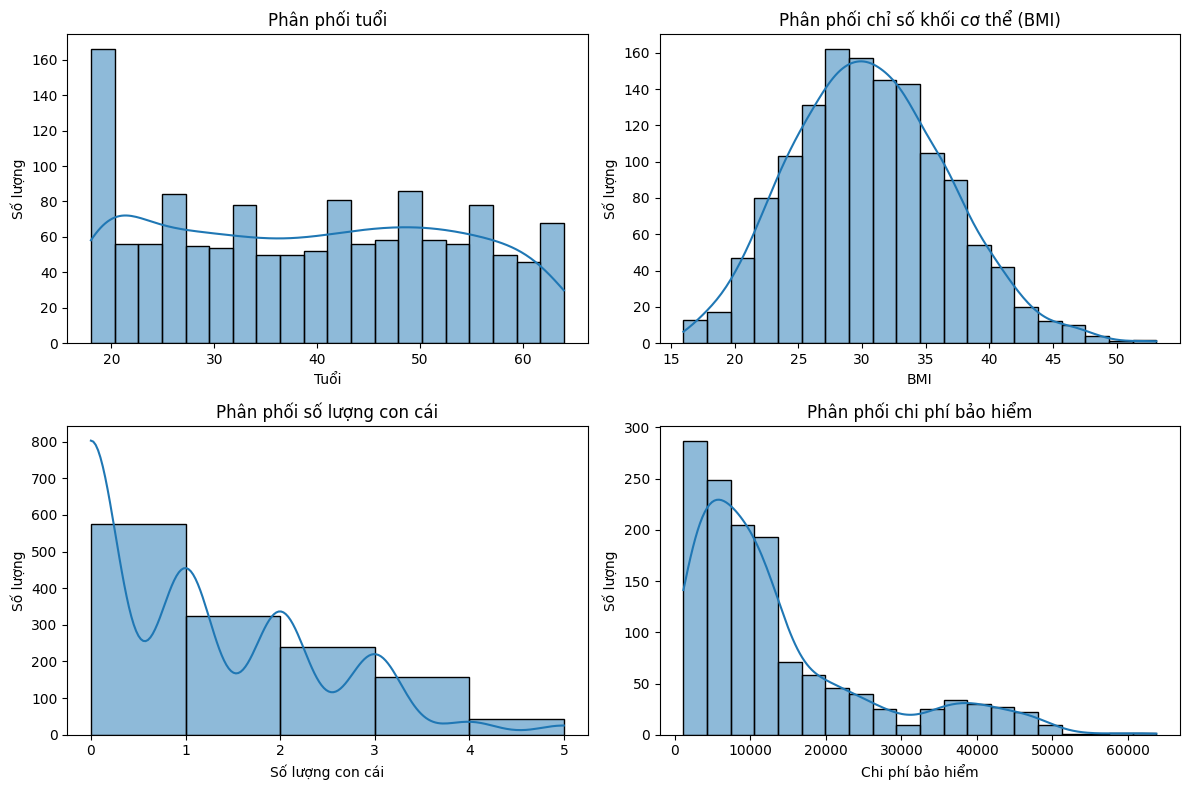

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một lưới 2x2 cho 4 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Biểu đồ phân phối của tuổi (age)
sns.histplot(data['age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Phân phối tuổi")
axes[0, 0].set_xlabel("Tuổi")
axes[0, 0].set_ylabel("Số lượng")

# Biểu đồ phân phối của chỉ số khối cơ thể (bmi)
sns.histplot(data['bmi'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Phân phối chỉ số khối cơ thể (BMI)")
axes[0, 1].set_xlabel("BMI")
axes[0, 1].set_ylabel("Số lượng")

# Biểu đồ phân phối của số lượng con cái (children)
sns.histplot(data['children'], bins=5, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Phân phối số lượng con cái")
axes[1, 0].set_xlabel("Số lượng con cái")
axes[1, 0].set_ylabel("Số lượng")

# Biểu đồ phân phối của chi phí bảo hiểm (charges)
sns.histplot(data['charges'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Phân phối chi phí bảo hiểm")
axes[1, 1].set_xlabel("Chi phí bảo hiểm")
axes[1, 1].set_ylabel("Số lượng")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

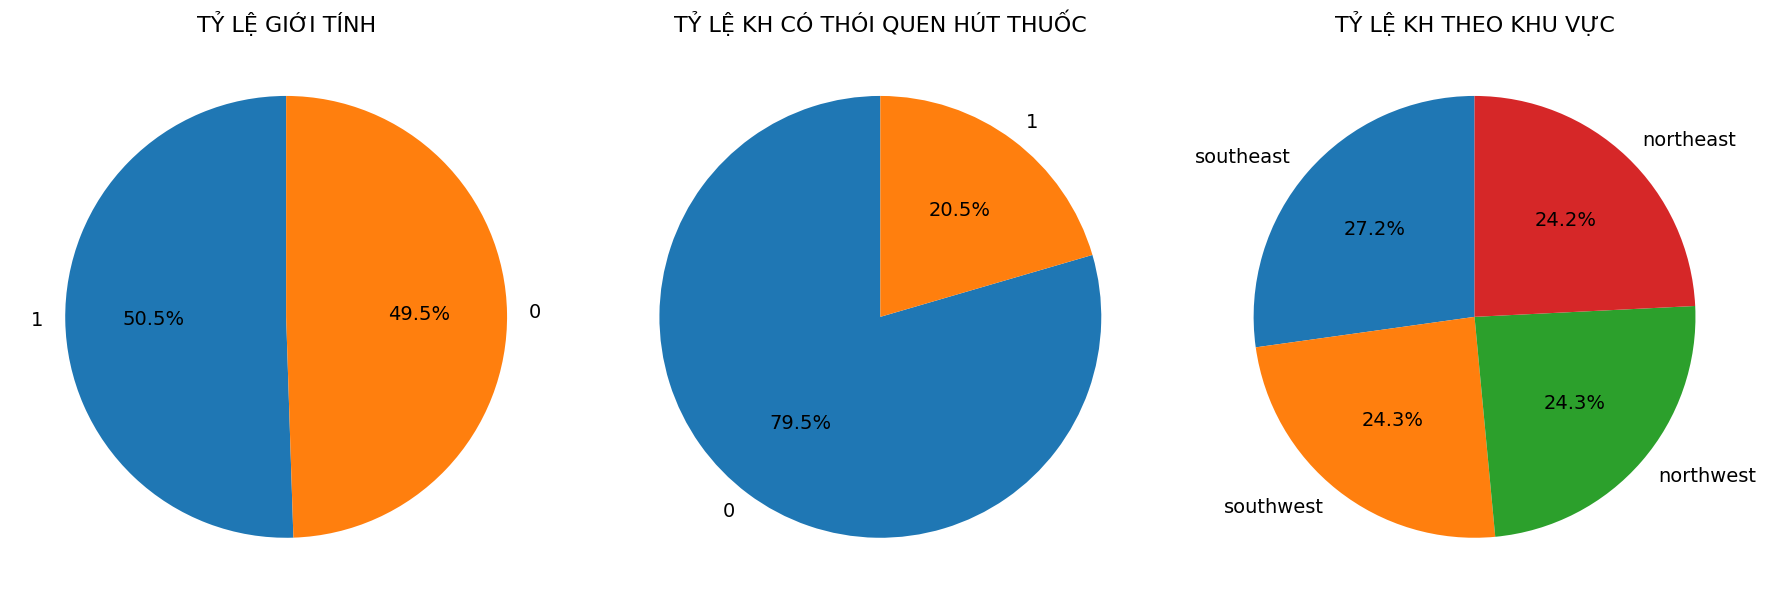

In [8]:
import matplotlib.pyplot as plt

# Tạo một lưới 1x3 cho 3 biểu đồ tròn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ tròn cho biến "sex"
sex_distribution = data['sex'].value_counts()
axes[0].pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0].set_title("TỶ LỆ GIỚI TÍNH", fontsize=16)

# Biểu đồ tròn cho biến "smoker"
smoker_distribution = data['smoker'].value_counts()
axes[1].pie(smoker_distribution, labels=smoker_distribution.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1].set_title("TỶ LỆ KH CÓ THÓI QUEN HÚT THUỐC", fontsize=16)

# Biểu đồ tròn cho biến "region"
region_distribution = data['region'].value_counts()
axes[2].pie(region_distribution, labels=region_distribution.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[2].set_title("TỶ LỆ KH THEO KHU VỰC", fontsize=16)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


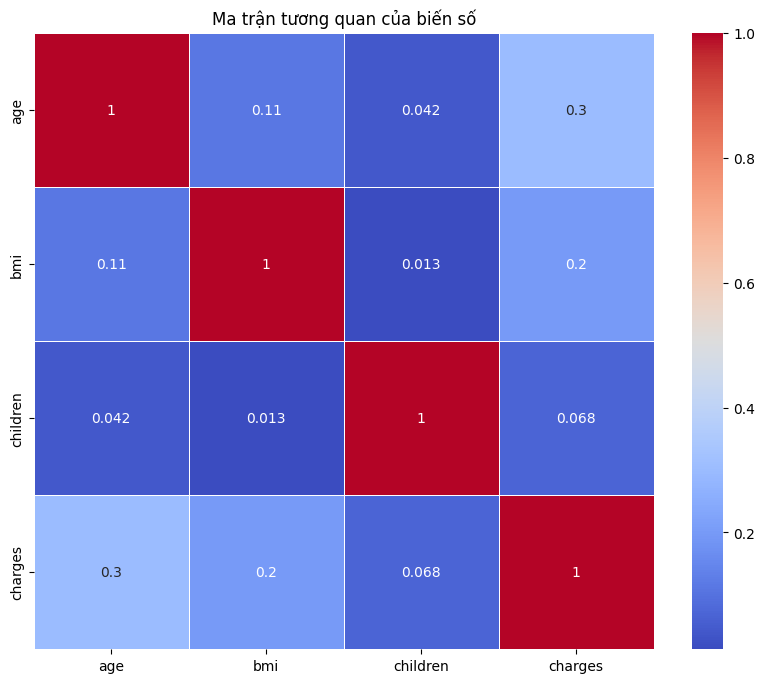

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lựa chọn các biến số số học (loại bỏ biến phân loại)
numerical_data = data[['age', 'bmi', 'children', 'charges']]

# Tạo ma trận tương quan
correlation_matrix = numerical_data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Ma trận tương quan của biến số")
plt.show()

## Tổng quan bộ dữ liệu sau thay đổi

In [15]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("us_health_insurance_after.csv")

# Hiểu về cấu trúc dữ liệu
num_rows, num_columns = data.shape
print(f'Số lượng quan sát: {num_rows}')
print(f'Số lượng cột: {num_columns}\n')
print(f'Các cột hiện có bao gồm: ')
for column in data.columns:
    print(f'{column}')

Số lượng quan sát: 1339
Số lượng cột: 13

Các cột hiện có bao gồm: 
CusID
age
is_male
married
num_of_children
bmi
smoker
state
region
employed
most_recent_insur_pur
insur_renewals
charges


In [16]:
import pandas as pd

# Kiểm tra giá trị trống
missing_values = data.isnull().sum()
print('Các giá trị bị thiếu:')
print(missing_values)

# Kiểm tra các giá trị bất thường
abnormal_values = pd.DataFrame()
for column in data.columns:
    if data[column].dtype != 'object':  # Kiểm tra nếu cột là số
        abnormal = data[data[column] < 0]  # Kiểm tra giá trị âm
        abnormal_values = pd.concat([abnormal_values, abnormal])

print("Các giá trị bất thường:")
print(abnormal_values)

Các giá trị bị thiếu:
CusID                     0
age                       0
is_male                   0
married                   0
num_of_children           0
bmi                       0
smoker                    0
state                     0
region                    0
employed                  0
most_recent_insur_pur     0
insur_renewals           18
charges                  22
dtype: int64
Các giá trị bất thường:
Empty DataFrame
Columns: [CusID, age, is_male, married, num_of_children, bmi, smoker, state, region, employed, most_recent_insur_pur, insur_renewals, charges]
Index: []


In [17]:
import pandas as pd

num_obs_before = data.shape[0]
total_obs_before = data.shape[0]
data_cleaned = data.dropna()
rows_deleted = total_obs_before - data_cleaned.shape[0]
total_obs_after = data_cleaned.shape[0]

print(f"Số dòng bị xóa: {rows_deleted}")
print(f"Tổng số quan sát sau khi xóa: {total_obs_after}")

# Lưu bộ dữ liệu sau khi xử lý
data.to_csv("us_health_insurance_cleanednull.csv", index=False)

Số dòng bị xóa: 22
Tổng số quan sát sau khi xóa: 1317


In [18]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv("us_health_insurance_cleanednull.csv")

# Kiểm tra giá trị bất thường trong cột most_recent_insur_pur
def is_invalid_date(date_string):
    try:
        pd.to_datetime(date_string)
        return False
    except ValueError:
        return True

# Tạo một cột mới để xác định giá trị thời gian bất thường
data['invalid_date'] = data['most_recent_insur_pur'].apply(is_invalid_date)
invalid_data = data[data['invalid_date']]

# Xuất ra những dòng có thời gian bất thường
invalid_data = invalid_data[['CusID', 'most_recent_insur_pur']]
print(invalid_data)

num_rows_deleted = invalid_data.shape[0]
data = data[~data['invalid_date']]
num_rows_remaining = data.shape[0]

print(f"Số dòng bị xóa: {num_rows_deleted}")
print(f"Số dòng còn lại: {num_rows_remaining}")

# Lưu bộ dữ liệu sau khi xử lý
data = data.drop('invalid_date', axis=1)
data.to_csv("us_health_insurance_cleaned.csv", index=False)

       CusID most_recent_insur_pur
65      CS66             9/31/2021
97      CS98             6/31/2009
121    CS122             2/31/2017
136    CS137             2/31/2018
157    CS158             2/30/2007
259    CS260             2/31/2020
314    CS315             9/31/2021
353    CS354             2/31/2018
393    CS394             2/30/2017
453    CS454             4/31/2018
462    CS463             2/31/2014
464    CS465             2/31/2008
477    CS478             4/31/2008
621    CS622             2/30/2018
680    CS681             2/30/2020
936    CS937             4/31/2018
971    CS972            11/31/2022
997    CS998             2/29/2021
1011  CS1012             2/29/2022
1016  CS1017             6/31/2022
1059  CS1060             9/31/2018
1070  CS1071             2/31/2022
1101  CS1102             2/31/2021
1105  CS1106             2/31/2021
1169  CS1170            11/31/2021
1203  CS1204             2/31/2022
Số dòng bị xóa: 26
Số dòng còn lại: 1313


In [19]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('us_health_insurance_cleaned.csv')

# Thống kê cơ bản về các cột số học
numerical_columns = data.select_dtypes(include=['int64', 'float64'])  # Lựa chọn các cột số học

# Tạo DataFrame chứa các thống kê cơ bản
basic_stats = pd.DataFrame({
    'Số lượng': numerical_columns.count(),
    'Trung bình': numerical_columns.mean(),
    'Độ lệch chuẩn': numerical_columns.std(),
    'Giá trị nhỏ nhất': numerical_columns.min(),
    'Giá trị lớn nhất': numerical_columns.max()
})

# Hiển thị kết quả thống kê
print('Thống kê cơ bản về các cột có biến kiểu numerical:')
print(basic_stats)

Thống kê cơ bản về các cột có biến kiểu numerical:
                 Số lượng     Trung bình  Độ lệch chuẩn  Giá trị nhỏ nhất  \
age                  1313      40.738766      13.485917             18.00   
is_male              1313       0.504950       0.500166              0.00   
married              1313       0.648134       0.477734              0.00   
num_of_children      1313       0.856055       1.178373              0.00   
bmi                  1313      28.821950       6.620460              9.86   
smoker               1313       0.274181       0.446271              0.00   
employed             1313       0.735720       0.441117              0.00   
insur_renewals       1313      23.444021      12.743546              2.00   
charges              1311  193372.293669   99978.208503          12888.00   

                 Giá trị lớn nhất  
age                         64.00  
is_male                      1.00  
married                      1.00  
num_of_children              5.00 

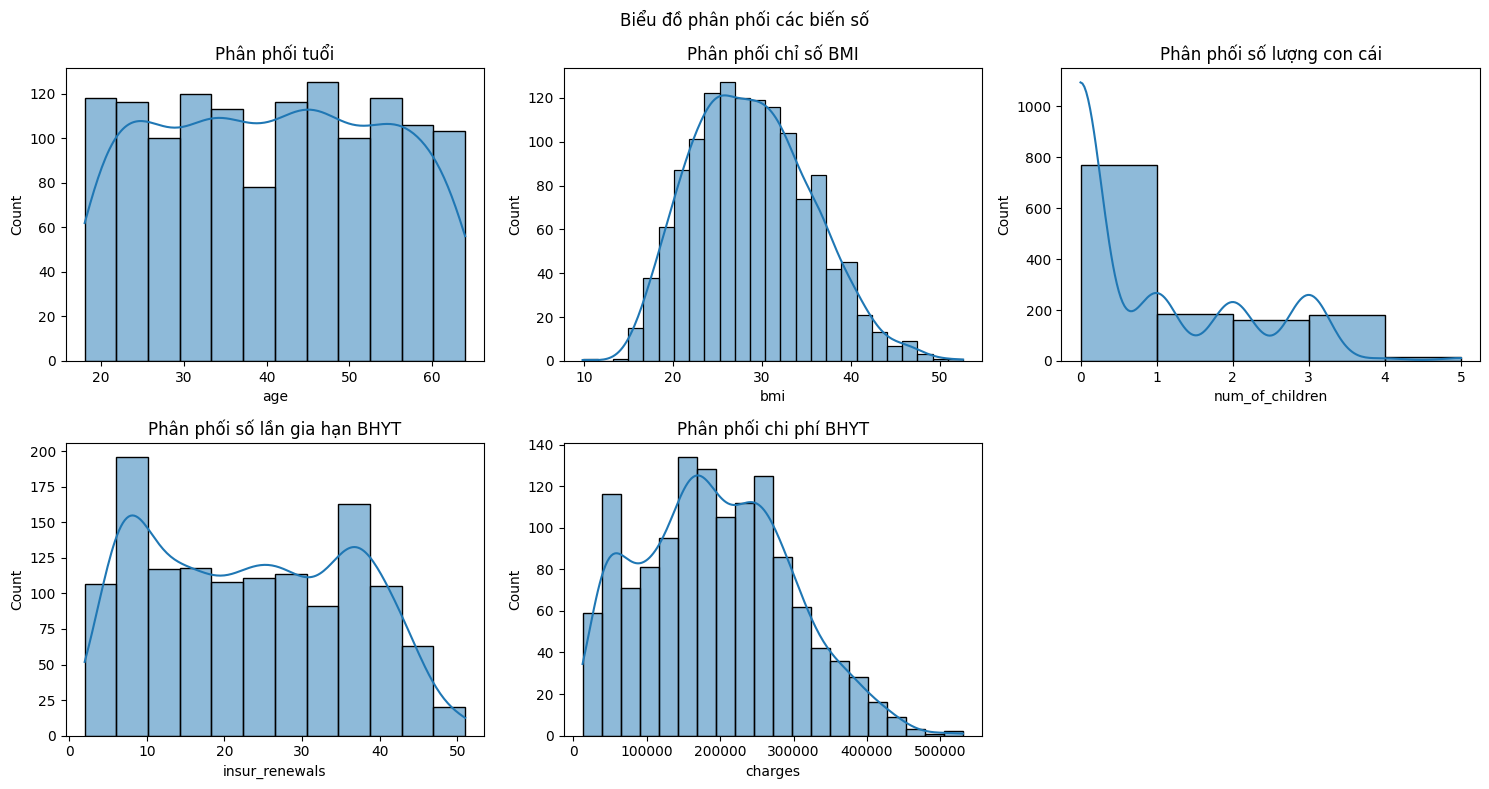

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy dữ liệu từ dataframe
data_to_plot = data[['age', 'bmi', 'num_of_children', 'insur_renewals', 'charges']]

# Tạo một lưới 2x3 để vẽ biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Biểu đồ phân phối các biến số")

# Biểu đồ phân phối cho age
sns.histplot(data_to_plot['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Phân phối tuổi")

# Biểu đồ phân phối cho BMI
sns.histplot(data_to_plot['bmi'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Phân phối chỉ số BMI")

# Biểu đồ phân phối cho num_of_children
sns.histplot(data_to_plot['num_of_children'], bins=5, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Phân phối số lượng con cái")

# Biểu đồ phân phối cho insur_renewals
sns.histplot(data_to_plot['insur_renewals'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Phân phối số lần gia hạn BHYT")

# Biểu đồ phân phối cho charges
sns.histplot(data_to_plot['charges'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Phân phối chi phí BHYT")

# Ẩn biểu đồ cuối cùng (nếu có)
axes[1, 2].axis('off')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


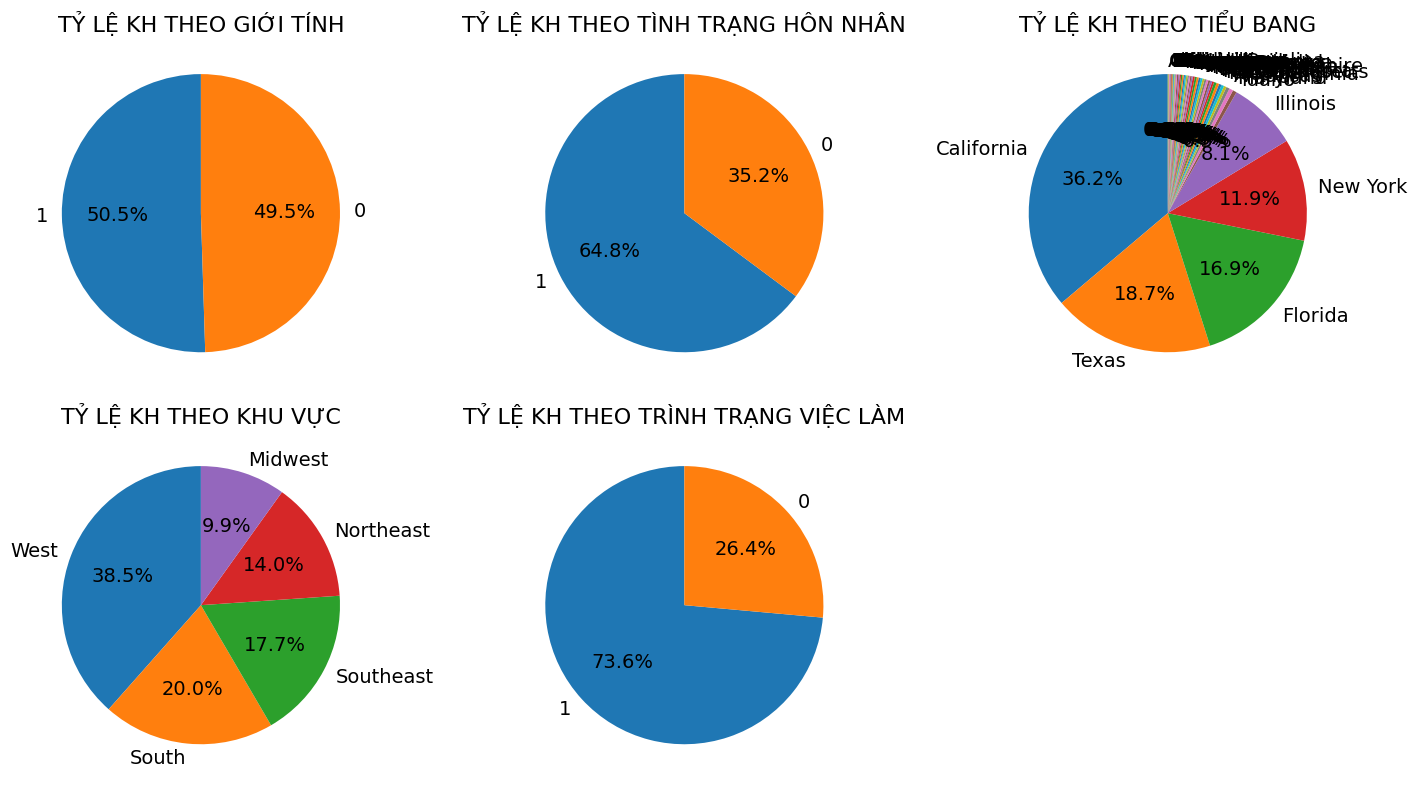

In [21]:
import matplotlib.pyplot as plt

# Chọn các cột phân loại để vẽ biểu đồ hình tròn
categorical_columns = ['is_male', 'married', 'state', 'region', 'employ']

# Tạo một lưới 2x3 để vẽ biểu đồ
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Vẽ biểu đồ tỷ lệ cho is_male
is_male_counts = data['is_male'].value_counts()
axes[0, 0].pie(is_male_counts, labels=is_male_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0, 0].set_title("TỶ LỆ KH THEO GIỚI TÍNH", fontsize=16)

# Vẽ biểu đồ tỷ lệ cho married
married_counts = data['married'].value_counts()
axes[0, 1].pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0, 1].set_title("TỶ LỆ KH THEO TÌNH TRẠNG HÔN NHÂN", fontsize=16)

# Vẽ biểu đồ tỷ lệ cho state
state_counts = data['state'].value_counts()
axes[0, 2].pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[0, 2].set_title("TỶ LỆ KH THEO TIỂU BANG", fontsize=16)

# Vẽ biểu đồ tỷ lệ cho region
region_counts = data['region'].value_counts()
axes[1, 0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1, 0].set_title("TỶ LỆ KH THEO KHU VỰC", fontsize=16)

# Vẽ biểu đồ tỷ lệ cho employ
employ_counts = data['employed'].value_counts()
axes[1, 1].pie(employ_counts, labels=employ_counts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axes[1, 1].set_title("TỶ LỆ KH THEO TRÌNH TRẠNG VIỆC LÀM", fontsize=16)

# Ẩn biểu đồ cuối cùng (nếu có)
axes[1, 2].axis('off')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

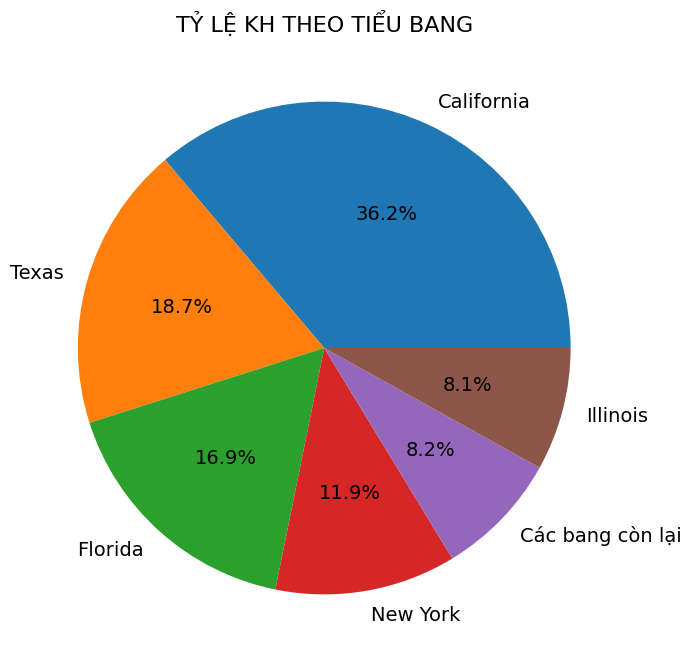

In [22]:
import matplotlib.pyplot as plt

# Gom nhóm các tiểu bang khác ngoài 5 tiểu bang đã chỉ định thành "Các bang còn lại"
data['state_grouped'] = data['state'].apply(lambda x: x if x in ['Florida', 'California', 'Texas', 'New York', 'Illinois'] else 'Các bang còn lại')

# Tính tỷ lệ của các nhóm tiểu bang
state_grouped_counts = data['state_grouped'].value_counts()

# Vẽ biểu đồ tỷ lệ các tiểu bang
plt.figure(figsize=(8, 8))
plt.pie(state_grouped_counts, labels=state_grouped_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("TỶ LỆ KH THEO TIỂU BANG", fontsize=16)
plt.show()

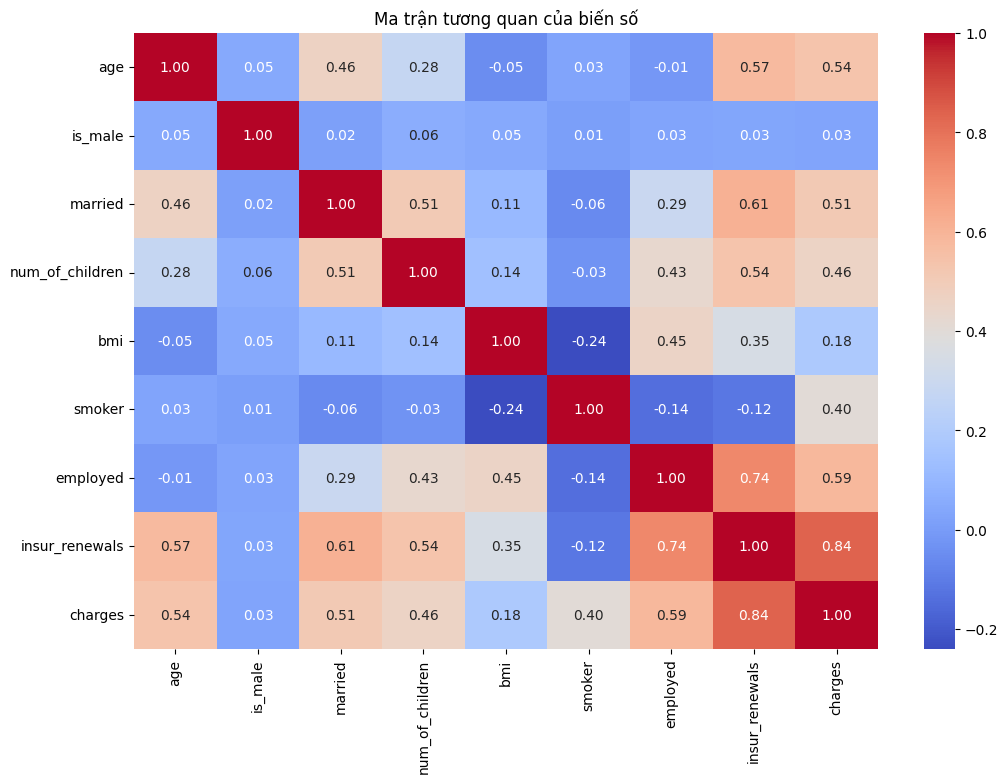

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("us_health_insurance_after.csv")

numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan của biến số")
plt.show()

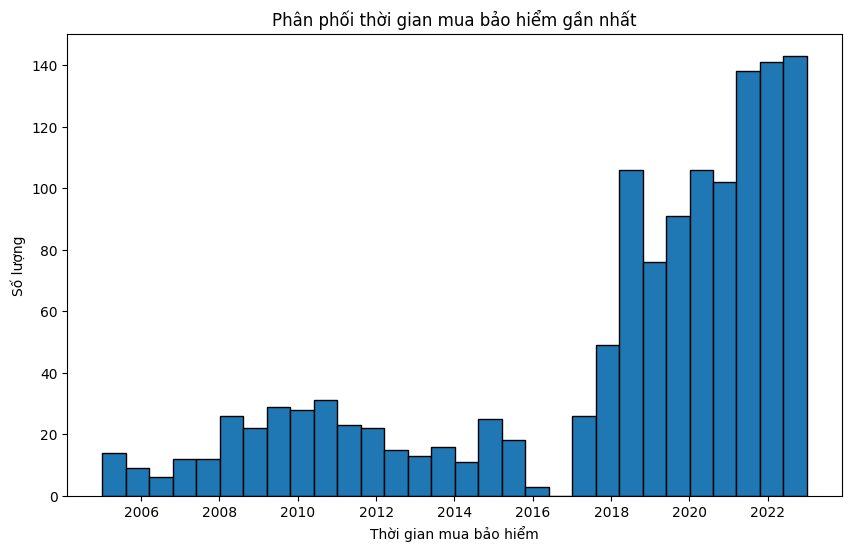

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp Excel
data = pd.read_csv("us_health_insurance_cleaned.csv")

# Lấy dữ liệu từ cột most_recent_insur_pur
most_recent_insur_pur = data['most_recent_insur_pur']

# Chuyển đổi dữ liệu thời gian sang định dạng datetime
most_recent_insur_pur = pd.to_datetime(most_recent_insur_pur)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(most_recent_insur_pur, bins=30, edgecolor='k')
plt.title("Phân phối thời gian mua bảo hiểm gần nhất")
plt.xlabel("Thời gian mua bảo hiểm")
plt.ylabel("Số lượng")
plt.show()

# **3.2.Null handling**

In [34]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("us_health_insurance_after.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CusID                  1313 non-null   object 
 1   age                    1313 non-null   int64  
 2   is_male                1313 non-null   int64  
 3   married                1313 non-null   int64  
 4   num_of_children        1313 non-null   int64  
 5   bmi                    1313 non-null   float64
 6   smoker                 1313 non-null   int64  
 7   state                  1313 non-null   object 
 8   region                 1313 non-null   object 
 9   employed               1313 non-null   int64  
 10  most_recent_insur_pur  1313 non-null   object 
 11  insur_renewals         1313 non-null   float64
 12  charges                1311 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 133.5+ KB


In [35]:
num_obs_before = data.shape[0]
total_obs_before = data.shape[0]
data = data.dropna()
rows_deleted = total_obs_before - data.shape[0]
total_obs_after = data.shape[0]

print(f"Số dòng bị xóa: {rows_deleted}")
print(f"Tổng số quan sát sau khi xóa: {total_obs_after}")

Số dòng bị xóa: 2
Tổng số quan sát sau khi xóa: 1311


# **3.3.PCA**

In [36]:
df = data.copy()
df.head(5)

,CusID,age,is_male,married,num_of_children,bmi,smoker,state,region,employed,most_recent_insur_pur,insur_renewals,charges
0,CS1,64,0,1,2,47.600,0,California,West,1,4/21/2022,51.0,328644.0
2,CS3,64,1,0,0,16.400,1,Florida,Southeast,0,04/04/2009,10.0,180851.0
3,CS4,64,1,1,0,36.955,0,New York,Northeast,1,1/22/2018,51.0,436356.0
4,CS5,64,0,1,1,38.665,0,New York,Northeast,1,11/10/2019,44.0,376464.0
5,CS6,64,1,1,0,23.800,0,Illinois,Midwest,1,03/04/2017,44.0,293568.0


In [37]:
from sklearn.decomposition import PCA
# Chọn các biến số
numeric_variables = df.select_dtypes(include=['float64', 'int64'])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
numeric_variables_scaled = scaler.fit_transform(numeric_variables)

# Áp dụng PCA
pca = PCA()
numeric_variables_pca = pca.fit_transform(numeric_variables_scaled)

# Lấy tỉ lệ phương sai tích lũy
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

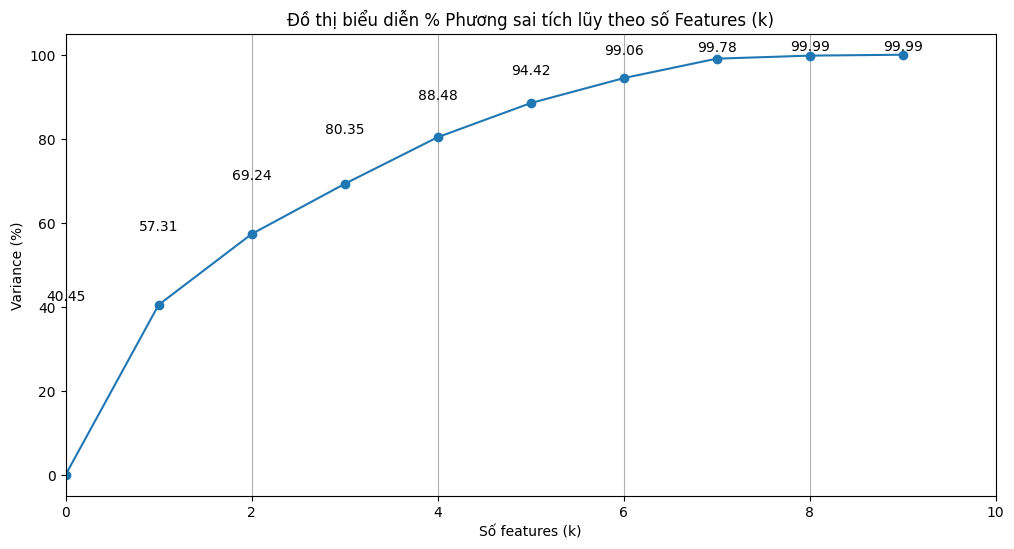

In [38]:
# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
nb_features = len(explained_variance_ratio)
points = np.cumsum(explained_variance_ratio) * 100
points = np.insert(points, 0, 0)
x_i = np.arange(0, nb_features + 1)
y_i = (points[-nb_features:]) // 0.01 / 100

plt.figure(figsize=(12, 6))
plt.plot(points, marker='o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % Phương sai tích lũy theo số Features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis='x')
for i in x_i:
    index = min(i, len(y_i) - 1)
    plt.text(i, y_i[index] + 1, f"{y_i[index]:.2f}", ha='center', va='baseline')

plt.show()

In [39]:
# Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(numeric_variables_scaled)

    new_var = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' % k, ': phương sai tích lũy ~ %.2f%%' % new_var,
          '--> tăng ~ %.2f%%' % (new_var - var))
    var = new_var

   * k =  1 : phương sai tích lũy ~ 40.46% --> tăng ~ 40.46%
   * k =  2 : phương sai tích lũy ~ 57.31% --> tăng ~ 16.85%
   * k =  3 : phương sai tích lũy ~ 69.25% --> tăng ~ 11.94%
   * k =  4 : phương sai tích lũy ~ 80.36% --> tăng ~ 11.11%
   * k =  5 : phương sai tích lũy ~ 88.48% --> tăng ~ 8.12%
   * k =  6 : phương sai tích lũy ~ 94.43% --> tăng ~ 5.95%
   * k =  7 : phương sai tích lũy ~ 99.06% --> tăng ~ 4.63%
   * k =  8 : phương sai tích lũy ~ 99.78% --> tăng ~ 0.72%
   * k =  9 : phương sai tích lũy ~ 100.00% --> tăng ~ 0.22%


In [40]:
data = data.drop(['is_male'], axis =1)

#**3.4.Outliers & Noisy handling**

In [11]:
# Kiểm tra giá trị bất thường trong cột most_recent_insur_pur
def is_invalid_date(date_string):
    try:
        pd.to_datetime(date_string)
        return False
    except ValueError:
        return True

# Tạo một cột mới để xác định giá trị thời gian bất thường
data['invalid_date'] = data['most_recent_insur_pur'].apply(is_invalid_date)
invalid_data = data[data['invalid_date']]

# Xuất ra những dòng có thời gian bất thường
invalid_data = invalid_data[['most_recent_insur_pur']]
print(invalid_data)

num_rows_deleted = invalid_data.shape[0]
data = data[~data['invalid_date']]
num_rows_remaining = data.shape[0]

print(f"Số dòng bị xóa: {num_rows_deleted}")
print(f"Số dòng còn lại: {num_rows_remaining}")

    most_recent_insur_pur
121             2/31/2017
136             2/31/2018
157             2/30/2007
259             2/31/2020
314             9/31/2021
353             2/31/2018
Số dòng bị xóa: 6
Số dòng còn lại: 1311


In [41]:
numerical_columns = data.drop(columns=['married', 'smoker', 'employed', 'num_of_children']).select_dtypes(include='number').columns
numerical_columns

Index(['age', 'bmi', 'insur_renewals', 'charges'], dtype='object')

Ta sẽ sử dụng quy tắc 3-sigma để tìm outlier của từng biến định lượng

In [42]:
mean_age = data.age.mean()
mean_bmi = data.bmi.mean()
mean_insur_renewals = data.insur_renewals.mean()
mean_charges = data.charges.mean()

std_age = data.age.std(ddof=1)
std_bmi = data.bmi.std(ddof=1)
std_insur_renewals = data.insur_renewals.std(ddof=1)
std_charges = data.charges.std(ddof=1)

In [43]:
lower_age = mean_age - 3 * std_age
upper_age = mean_age + 3 * std_age

lower_bmi = mean_bmi - 3 * std_bmi
upper_bmi = mean_bmi + 3 * std_bmi

lower_insur_renewals = mean_insur_renewals - 3 * std_insur_renewals
upper_insur_renewals = mean_insur_renewals + 3 * std_insur_renewals

lower_charges = mean_charges - 3 * std_charges
upper_charges = mean_charges + 3 * std_charges

In [44]:
outliers_age = data.age[(data.age < lower_age) | (data.age > upper_age)]
outliers_bmi = data.bmi[(data.bmi < lower_bmi) | (data.bmi > upper_bmi)]
outliers_insur_renewals = data.insur_renewals[(data.insur_renewals < lower_insur_renewals) | (data.insur_renewals > upper_insur_renewals)]
outliers_charges = data.charges[(data.charges < lower_charges) | (data.charges > upper_charges)]

In [45]:
print(f"Outliers cột {numerical_columns[0]} :{list(outliers_age)}")
print(f"Outliers cột {numerical_columns[1]} :{list(outliers_bmi)}")
print(f"Outliers cột {numerical_columns[2]} :{list(outliers_insur_renewals)}")
print(f"Outliers cột {numerical_columns[3]} :{list(outliers_charges)}")

Outliers cột age :[]
Outliers cột bmi :[49.06, 52.58, 50.38]
Outliers cột insur_renewals :[]
Outliers cột charges :[530823.0, 512614.0, 499200.0]


Dựa vào quy tắc 3-sigma ta có thể thấy được cột bmi và charges chứa các outliers

Để trực quan hơn ta sẽ sử dụng biểu đồ boxplot để quan sát outlier

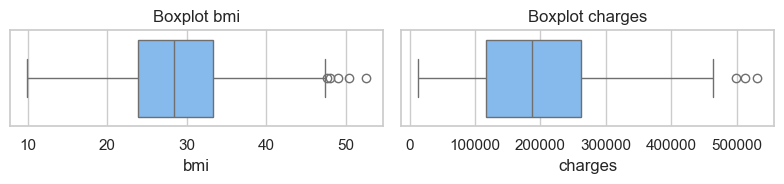

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
plt.figure(figsize=(8, 2))

num_cols = ['bmi', 'charges']
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=data[col], color=sns.xkcd_rgb['sky blue'])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

Xử lí các outliers của 2 cột charges và bmi

Ta sẽ loại bỏ những giá trị outliers dựa trên index của các outliers ta vừa có được

In [47]:
index_outliers_bmi = list(outliers_bmi.index)
index_outliers_charges = list(outliers_charges.index)
data.drop(index_outliers_bmi, axis=0, inplace=True)
data.drop(index_outliers_charges, axis=0, inplace=True)

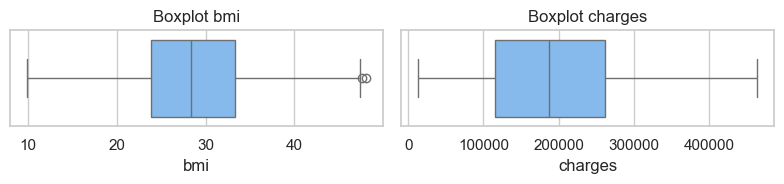

In [48]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 2))

num_cols = ['bmi', 'charges']
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=data[col], color=sns.xkcd_rgb['sky blue'])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

Quan sát biểu đồ boxplot sau khi loại bỏ outliers nhưng cột bmi vẫn còn 1 vài giá trị outliers

Vì vậy ta sử dụng phương pháp Khoảng Interquartile (IQR) để xử lí tiếp outliers cho cột bmi

In [49]:
def percentile_method(data):
  Q1_bmi = np.percentile(data.bmi, 25, method = 'midpoint')
  Q3_bmi = np.percentile(data.bmi, 75, method = 'midpoint')
  IQR_bmi = Q3_bmi - Q1_bmi
  lower_bmi = Q1_bmi - 1.5*IQR_bmi
  upper_bmi = Q3_bmi + 1.5*IQR_bmi

  outliers_bmi = data.bmi[(data.bmi < lower_bmi) | (data.bmi > upper_bmi)]
  return outliers_bmi

In [50]:
outliers_bmi = percentile_method(data)

In [51]:
print(f"Outliers cột {numerical_columns[1]} :{list(outliers_bmi)}")

Outliers cột bmi :[47.6, 48.07]


In [52]:
index_outliers_bmi = list(outliers_bmi.index)
data.drop(index_outliers_bmi, axis=0, inplace=True)

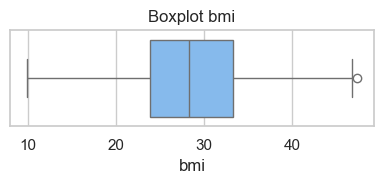

In [53]:
sns.set(style='whitegrid')
plt.figure(figsize=(4, 2))

num_cols = ['bmi']
for i, col in enumerate(num_cols, 1):
    sns.boxplot(x=data[col], color=sns.xkcd_rgb['sky blue'])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

Sau khi sử dụng phương pháp Khoảng Interquartile (IQR) thì cột bmi vẫn còn xuất hiện 1 giá trị Outliers, vì vậy ta tiếp xử dụng phương pháp này một lần nữa để xác định giá trị Outliers một lần nữa

In [54]:
outliers_bmi = percentile_method(data)
print(f"Outliers cột {numerical_columns[1]} :{list(outliers_bmi)}")

Outliers cột bmi :[47.41]


In [55]:
index_outliers_bmi = list(outliers_bmi.index)
data.drop(index_outliers_bmi, axis=0, inplace=True)

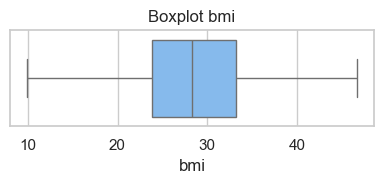

In [70]:
sns.set(style='whitegrid')
plt.figure(figsize=(4, 2))

num_cols = ['bmi']
for i, col in enumerate(num_cols, 1):
    sns.boxplot(x=data[col], color=sns.xkcd_rgb['sky blue'])
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

Sau khi sử dụng 2 lần phương pháp Khoảng Interquartile (IQR) thì cột bmi hoàn toàn không còn xuất hiện giá trị Outliers nào nữa

In [69]:
data[numerical_columns].describe()

,age,bmi,insur_renewals,charges
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,40.618280,28.740676,23.328725,192306.602919
std,13.432534,6.476352,12.694946,98859.935657
min,18.000000,9.860000,2.000000,12888.000000
25%,29.000000,23.845000,12.000000,115992.000000
50%,41.000000,28.310000,23.000000,186846.000000
75%,52.000000,33.222500,35.000000,261799.750000
max,64.000000,46.750000,51.000000,464168.000000


## **Save new dataset**

In [80]:
# Lưu bộ dữ liệu sau khi xử lý
data.to_csv("us_health_insurance_cleaned.csv", index=False)
df_cleaned = pd.read_csv('us_health_insurance_cleaned.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CusID                  1302 non-null   object 
 1   age                    1302 non-null   int64  
 2   married                1302 non-null   int64  
 3   num_of_children        1302 non-null   int64  
 4   bmi                    1302 non-null   float64
 5   smoker                 1302 non-null   int64  
 6   state                  1302 non-null   object 
 7   region                 1302 non-null   object 
 8   employed               1302 non-null   int64  
 9   most_recent_insur_pur  1302 non-null   object 
 10  insur_renewals         1302 non-null   float64
 11  charges                1302 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 122.2+ KB


#**3.4.Effectiveness of variable changes**

In [81]:
!pip install yellowbrick

In [111]:
#Thư viện sử dụng
from yellowbrick.model_selection import LearningCurve

In [139]:
# Đọc dữ liệu
data_before = pd.read_csv('us_health_insurance_before.csv')
data_after = pd.read_csv("us_health_insurance_after.csv")

R^2 Score: 0.7811302113434095


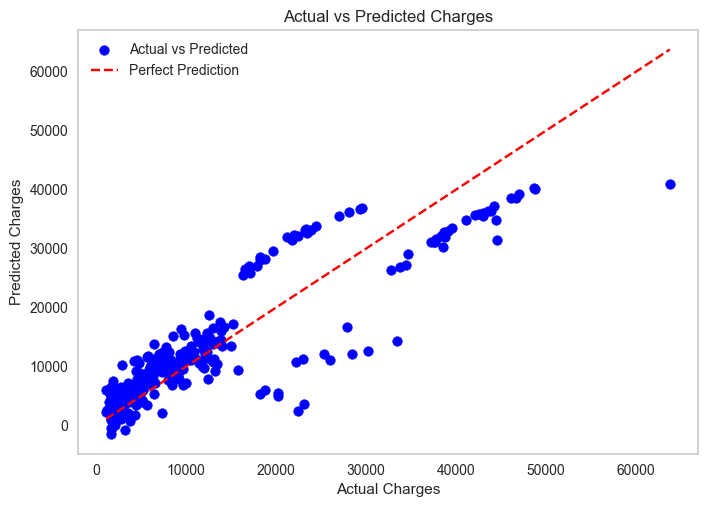

In [152]:
# Bộ dữ liệu ban đầu

# Chọn biến độc lập
independent_vars = ['age', 'sex', 'bmi', 'children', 'smoker']

# Chọn biến phụ thuộc
dependent_var = 'charges'

# Tạo DataFrame
X = data_before[independent_vars]
y = data_before[dependent_var]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model_before = LinearRegression()
model_before.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
score = model_before.score(X_test, y_test)
print(f'R^2 Score: {score}')

# Dự đoán giá trị trên tập kiểm tra
y_pred = model_before.predict(X_test)

# Biểu đồ
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(False)
plt.legend()
plt.show()


In [150]:
!pip install LinearRegression

R^2 Score: 0.9529700618789345


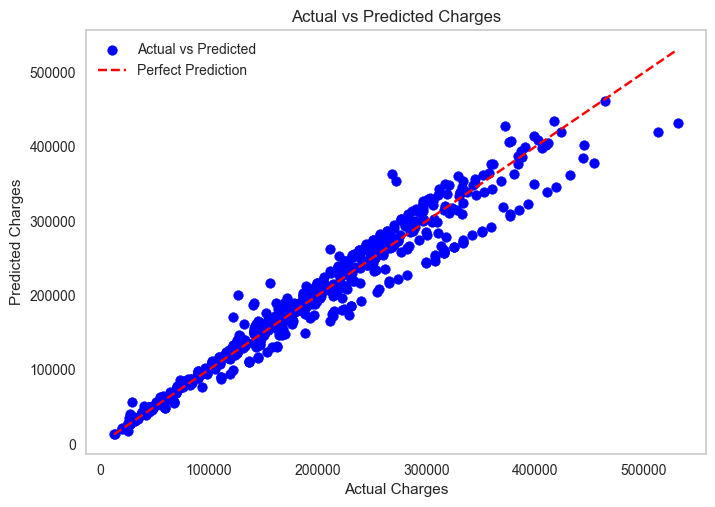

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Bộ dữ liệu sau thay đổi
data_after = pd.read_csv("us_health_insurance_after.csv")

# Loại bỏ các hàng có giá trị NaN trong biến phụ thuộc
data_after = data_after.dropna(subset=['charges'])

# Chọn biến độc lập
independent_vars = ['age', 'married', 'num_of_children', 'bmi', 'smoker', 'employed', 'insur_renewals']

# Chọn biến phụ thuộc
dependent_var = 'charges'

# Tạo DataFrame
X = data_after[independent_vars]
y = data_after[dependent_var]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

# Xây dựng mô hình hồi quy tuyến tính
model_after = LinearRegression()
model_after.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
score = model_after.score(X_test, y_test)
print(f'R^2 Score: {score}')

# Dự đoán giá trị trên tập kiểm tra
y_pred = model_after.predict(X_test)

# Biểu đồ
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(False)
plt.legend()
plt.show()

NHẬN XÉT:

**Với bộ dữ liệu ban đầu:**
+ Hệ số xác định R^2 = 0.7811, nghĩa là sau khi thực hiện hồi quy tuyến tính, mô hình giải thích được 78.33% sự biến biến thiên của biến charges. Ngoài ra, từ biểu đồ cho thấy dữ liệu xuất hiện nhiều giá trị nằm xa đường hoàn hảo, tức sai số giữa dự đoán và giá trị thực tế cao.

**Với bộ dữ liệu sau thay đổi:**
+ Hệ số xác định R^2 = 0.9585, sau khi thực hiện thay đổi bộ dữ liệu, mô hình đã giải thích được 95.85% sự biến biến thiên của charges. Bên cạnh đó, biểu đồ cho thấy ít điểm nằm xa đường hoàn hảo hơn vo với bộ dữ liệu ban đầu, tức sai số nhỏ hơn ban đầu.

**Kết luận rằng:**
+ Sau khi thêm biến thuộc tính, sự thay đổi về biến charges hiệu quả hơn so với bộ dữ liệu ban đầu. Điều này có thể do các biến mới như married, employ đã phần nào ảnh hưởng đến biến charges và làm tăng độ chính xác của mô hình hồi quy tuyến tính.

Cross-Validation Scores: [0.96319876 0.94682283 0.94899932 0.94133769 0.94941725 0.94247632
 0.9467432  0.9500953  0.94292701 0.93891981 0.95194934 0.94273202
 0.95082693 0.95318587 0.95038363 0.94471397 0.94569051 0.95017827
 0.95309616 0.96244351 0.94225169 0.94835579 0.94992622 0.9387658
 0.95858083 0.9463429  0.94290225 0.95357704 0.94621909 0.95125973
 0.95084831 0.95291917 0.95499488 0.94682725 0.95681122 0.94469519
 0.9418217  0.95937532 0.9443505  0.93767095 0.9489604  0.95013063
 0.95188241 0.95485866 0.95004237 0.95716203 0.94244215 0.94738911
 0.95888735 0.9533607  0.95445422 0.94812534 0.95471229 0.94676894
 0.95181463 0.95722205 0.95575212 0.94833335 0.94137948 0.95253398
 0.95055917 0.94953057 0.95520317 0.94673934 0.94877369 0.96106172
 0.95033822 0.95293401 0.95083221 0.94102602 0.94025185 0.95399396
 0.94879256 0.95902864 0.95114075 0.94669596 0.95144742 0.95430008
 0.94626643 0.95362725 0.94371466 0.95698329 0.95930846 0.94180328
 0.96004702 0.95122905 0.95271381 0.95

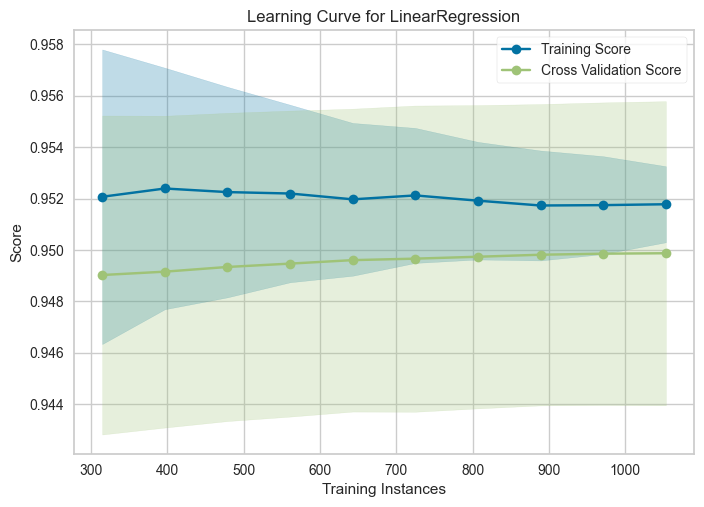

<Axes: title={'center': 'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [164]:
# Chọn biến độc lập và phụ thuộc từ data_after
X_after = data_after[['age', 'married', 'num_of_children', 'bmi', 'smoker', 'employed', 'insur_renewals']]
y_after = data_after['charges']

# Sử dụng Cross-Validation để đánh giá mô hình
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cross_val_scores = cross_val_score(model_after, X_after, y_after, cv=cv)

print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cross_val_scores)}')

# Vẽ Learning Curve để kiểm tra overfitting
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(model_after, train_sizes=sizes, cv=cv, scoring='r2', n_jobs=4)

visualizer.fit(X_after, y_after)
visualizer.show()

ShuffleSplit:
- Chia bộ dữ liệu ngẫu nhiên 100 lần với tỉ lệ tập kiểm định là 20%.

train_sizes:
- Mảng các kích thước tập huấn luyện mà Learning Curve sẽ sử dụng để vẽ đường mà nó học được. Trong trường hợp này, sử dụng 10 giá trị từ 0.3 đến 1.0.

model_after: Mô hình học máy đã được huấn luyện.

train_sizes: Mảng kích thước tập huấn luyện như đã định nghĩa trước đó.

cv: Là phương pháp chia dữ liệu như đã định nghĩa.

scoring: Là phương pháp đánh giá hiệu suất của mô hình, ở đây là 'r2' (R-squared).

n_jobs: Số lượng công việc được thực hiện đồng thời khi tính toán.

phương thức 'fit' dùng để tính toán Learning Curve dựa trên dữ liệu đã cung cấp

Cross-Validation Scores: [0.96319876 0.94682283 0.94899932 0.94133769 0.94941725 0.94247632
 0.9467432  0.9500953  0.94292701 0.93891981 0.95194934 0.94273202
 0.95082693 0.95318587 0.95038363 0.94471397 0.94569051 0.95017827
 0.95309616 0.96244351 0.94225169 0.94835579 0.94992622 0.9387658
 0.95858083 0.9463429  0.94290225 0.95357704 0.94621909 0.95125973
 0.95084831 0.95291917 0.95499488 0.94682725 0.95681122 0.94469519
 0.9418217  0.95937532 0.9443505  0.93767095 0.9489604  0.95013063
 0.95188241 0.95485866 0.95004237 0.95716203 0.94244215 0.94738911
 0.95888735 0.9533607  0.95445422 0.94812534 0.95471229 0.94676894
 0.95181463 0.95722205 0.95575212 0.94833335 0.94137948 0.95253398
 0.95055917 0.94953057 0.95520317 0.94673934 0.94877369 0.96106172
 0.95033822 0.95293401 0.95083221 0.94102602 0.94025185 0.95399396
 0.94879256 0.95902864 0.95114075 0.94669596 0.95144742 0.95430008
 0.94626643 0.95362725 0.94371466 0.95698329 0.95930846 0.94180328
 0.96004702 0.95122905 0.95271381 0.95

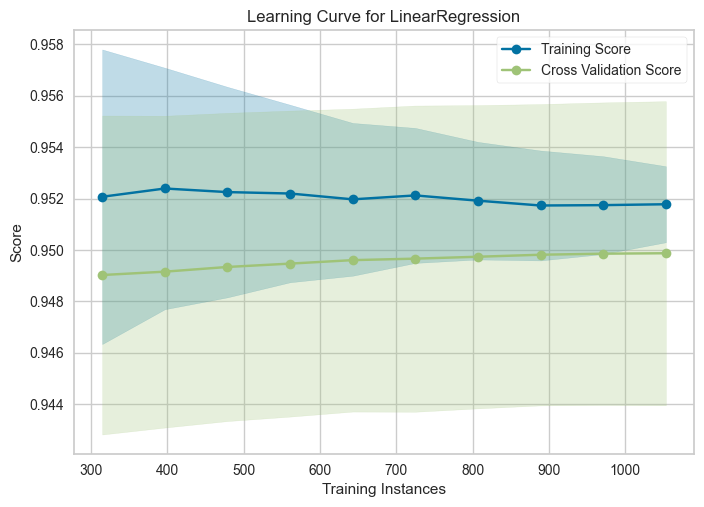

<Axes: title={'center': 'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [165]:
# Sử dụng Cross-Validation để đánh giá mô hình
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cross_val_scores = cross_val_score(model_before, X, y, cv=cv)

print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cross_val_scores)}')

# Vẽ Learning Curve để kiểm tra overfitting
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(model_before, train_sizes=sizes, cv=cv, scoring='r2', n_jobs=4)

visualizer.fit(X, y)
visualizer.show()